# Binary Classification with a Bank Churn Dataset

## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

## Load Data

In [2]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')
testdata = pd.read_csv('Data/test.csv')

In [3]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [4]:
test_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


## Data Processing

In [5]:
# Drop unnecessary columns
columns_to_drop = ['id', 'CustomerId', 'Surname']
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

# One-hot encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Geography', 'Gender'])
test_data = pd.get_dummies(test_data, columns=['Geography', 'Gender'])

## Exploratory Data Analysis (EDA)

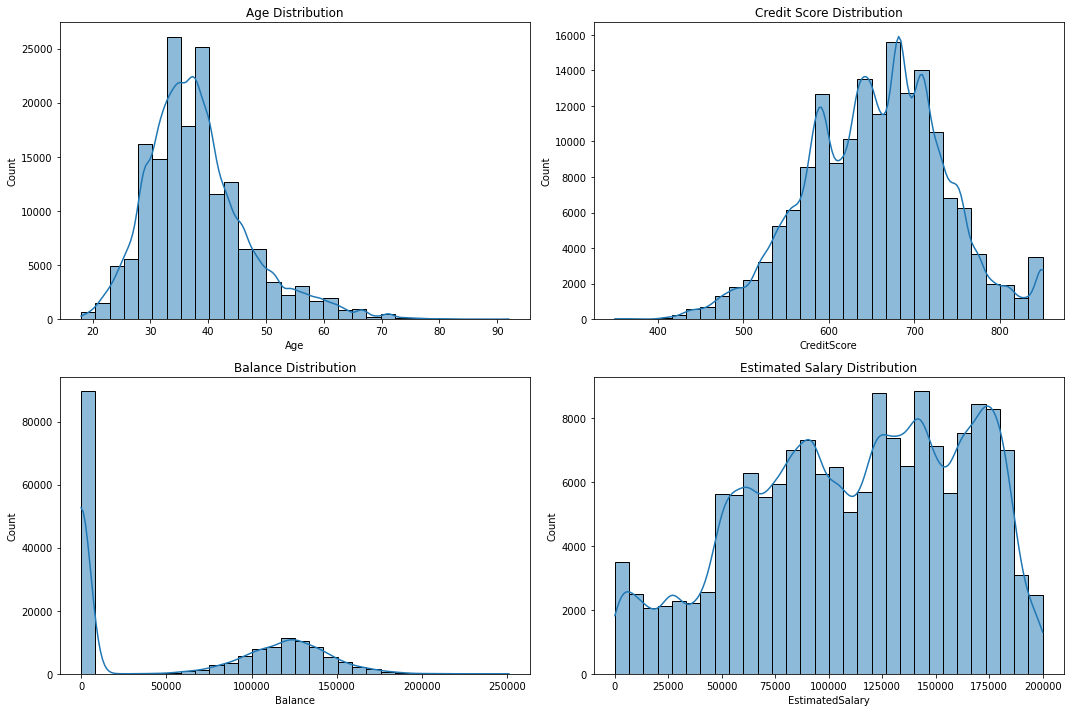

In [6]:
# Histograms for Age, CreditScore, Balance, and EstimatedSalary
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting each histogram
sns.histplot(train_data['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(train_data['CreditScore'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Credit Score Distribution')

sns.histplot(train_data['Balance'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Balance Distribution')

sns.histplot(train_data['EstimatedSalary'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

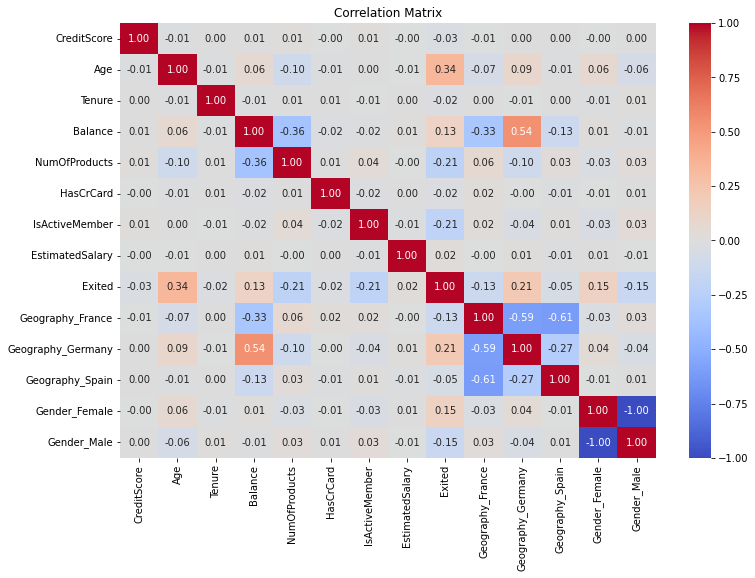

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

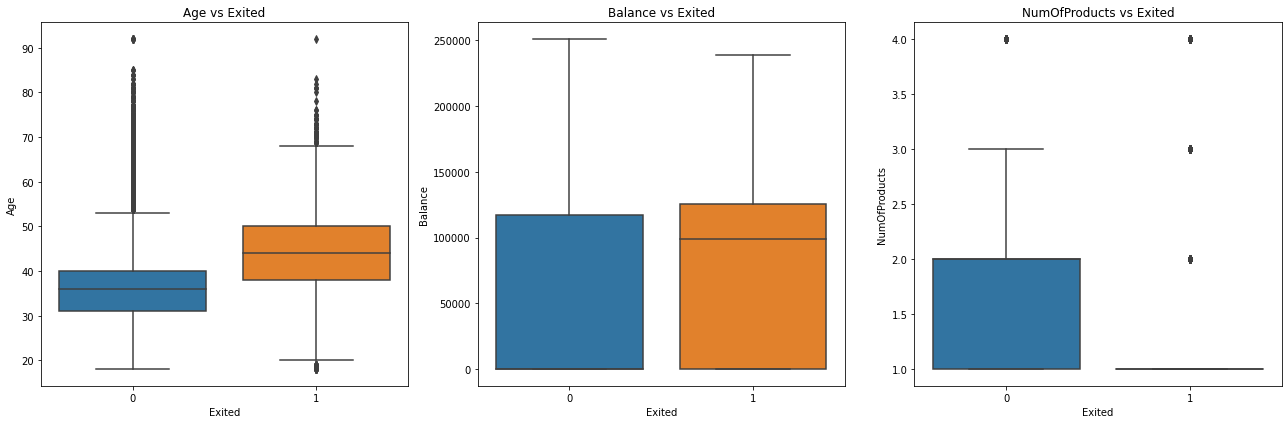

In [8]:
# Box plots for Age, Balance, and NumOfProducts against Exited status
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Exited', y='Age', data=train_data, ax=axes[0])
axes[0].set_title('Age vs Exited')

sns.boxplot(x='Exited', y='Balance', data=train_data, ax=axes[1])
axes[1].set_title('Balance vs Exited')

sns.boxplot(x='Exited', y='NumOfProducts', data=train_data, ax=axes[2])
axes[2].set_title('NumOfProducts vs Exited')

plt.tight_layout()
plt.show()

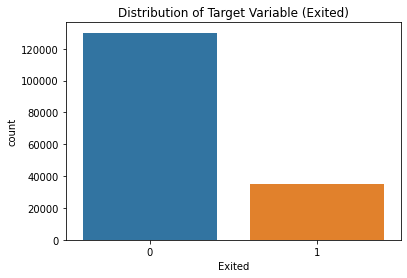

In [9]:
# Target variable distribution
sns.countplot(x='Exited', data=train_data)
plt.title('Distribution of Target Variable (Exited)')
plt.show()

## Prepare Data For Modeling

In [10]:
# Split into features and target
X = train_data.drop('Exited', axis=1)
y = train_data['Exited']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## Model Training for XGBoost Classifier

In [11]:
# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define parameter grid
xgb_param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6]
}

# GridSearchCV for hyperparameter tuning
xgb_grid_search = GridSearchCV(xgb_classifier, xgb_param_grid, cv=5, n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("XGBoost Best Parameters:", xgb_grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}


## Model Evaluation

In [12]:
# Best model from grid search
best_xgb_model = xgb_grid_search.best_estimator_

# Predict on validation set
xgb_val_predictions = best_xgb_model.predict(X_val_scaled)

# Model evaluation
xgb_accuracy = accuracy_score(y_val, xgb_val_predictions)
print(f'XGBoost Model Accuracy: {xgb_accuracy:.2f}')
print(classification_report(y_val, xgb_val_predictions))

XGBoost Model Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007



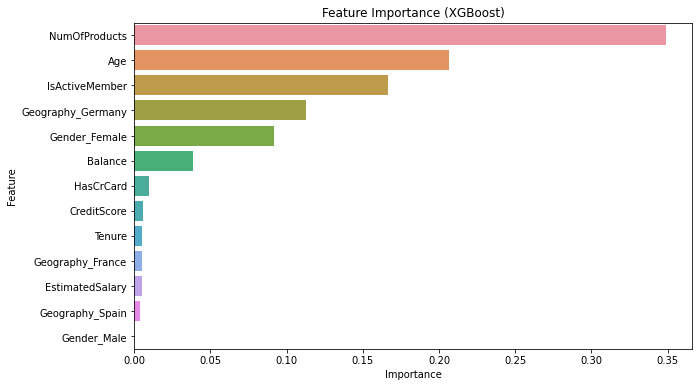

In [13]:
# Extracting feature importances
feature_importances = best_xgb_model.feature_importances_

# Creating a DataFrame for visualization
features = X.columns  # Features names (from the dataset used for training the model)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting the features by importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Prepare Test Data and Make Predictions

In [14]:
# Standardize test data
X_test_scaled = scaler.transform(test_data.drop('Exited', axis=1, errors='ignore'))

# Predict probabilities for the 'Exited' class
test_predictions = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

In [15]:
# Prepare submission DataFrame
submission_df = pd.DataFrame({'id': testdata['id'], 'Exited': test_predictions})

# Save to CSV for submission
submission_df.to_csv('submission.csv', index=False)
print(submission_df.head(10))

       id    Exited
0  165034  0.024138
1  165035  0.795032
2  165036  0.027235
3  165037  0.245008
4  165038  0.360851
5  165039  0.044118
6  165040  0.039488
7  165041  0.087695
8  165042  0.587307
9  165043  0.012708
